In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/Admission_Predict.csv")
input=df.drop(['Chance of Admit ','Serial No.'],axis=1)
label=df['Chance of Admit ']

df.head()

# Data Scaling and Standardization

In [20]:
X= np.array(input)
y= np.array(label)
X = (X + np.mean(X,axis=0))/(np.std(X,axis=0))

# Linear Regression Pipeline

In [21]:
import numpy as np

class LinearRegression():
    def __init__(self, lr=0.1, epochs=1000, clip_value=1.0, batch_size=64, reg_type=None, reg_strength=0.01):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.clip_value = clip_value
        self.weights = None
        self.bias = None
        self.reg_type = reg_type
        self.reg_strength = reg_strength
        self.cost_history = []

    def fit(self, X, y, method='gradient_descent'):
        samples, features = X.shape
        self.weights = np.random.rand(features) * 0.01
        self.bias = 0
        self.descent_methods = {
            'gradient_descent': lambda: self.gradient_descent(X, y),
            'SGD': lambda: self.stochastic_gradient_descent(X, y),
            'mini_batch': lambda: self.mini_batch_descent(X, y)
        }
        self.descent_methods[method]()

    def compute_gradient(self, X, y):
        samples = X.shape[0]
        y_pred = np.dot(X, self.weights) + self.bias
        dy_pred = y_pred - y
        dW = (1/samples) * (np.dot(X.T, dy_pred))
        db = (1/samples) * np.sum(dy_pred)
        if self.reg_type == 'l1':
            dW += self.reg_strength * np.sign(self.weights)
        elif self.reg_type == 'l2':
            dW += self.reg_strength * self.weights

        dW = np.clip(dW, -self.clip_value, self.clip_value)
        db = np.clip(db, -self.clip_value, self.clip_value)
        return dW, db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def cost(self, X, y):
        samples = X.shape[0]
        y_pred = self.predict(X)
        mse = (1/(2*samples)) * np.sum(np.square(y - y_pred))

        if self.reg_type == 'l1':
            mse += self.reg_strength * np.sum(np.abs(self.weights))
        elif self.reg_type == 'l2':
            mse += 0.5 * self.reg_strength * np.sum(np.square(self.weights))

        return mse

    def gradient_descent(self, X, y):
        for _ in range(self.epochs):
            dW, db = self.compute_gradient(X, y)
            self.weights -= self.lr * dW
            self.bias -= self.lr * db
            self.cost_history.append(self.cost(X, y))

    def stochastic_gradient_descent(self, X, y):
        samples = X.shape[0]
        for _ in range(self.epochs):
            indices = np.random.permutation(samples)
            for idx in indices:
                X_i = X[idx:idx+1]
                y_i = y[idx:idx+1]
                dW, db = self.compute_gradient(X_i, y_i)
                self.weights -= self.lr * dW
                self.bias -= self.lr * db
                self.cost_history.append(self.cost(X, y))

    def mini_batch_descent(self, X, y):
        samples = X.shape[0]
        for _ in range(self.epochs):
            indices = np.random.permutation(samples)
            for i in range(0, samples, self.batch_size):
                idx = indices[i:min(i+self.batch_size, samples)]
                X_batch = X[idx]
                y_batch = y[idx]
                dW, db = self.compute_gradient(X_batch, y_batch)
                self.weights -= self.lr * dW
                self.bias -= self.lr * db
                self.cost_history.append(self.cost(X, y))

    def r2_score(self,X,y):
      y_pred = self.predict(X)
      y_mean=np.mean(y)
      ss_res=np.sum(np.square(y-y_pred))
      ss_mean=np.sum(np.square(y-y_mean))
      return 1-(ss_res/ss_mean)

    def mae(self,X,y):
      y_pred = self.predict(X)
      return np.sum(np.abs(y-y_pred))/len(y)

    def plot_cost_history(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.cost_history) + 1), self.cost_history)
        plt.title('Cost Function over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.grid(True)
        plt.show()



MSE:  0.0060013148294893225
R2:  0.4083482961333049
MAE:  0.08647088933331944


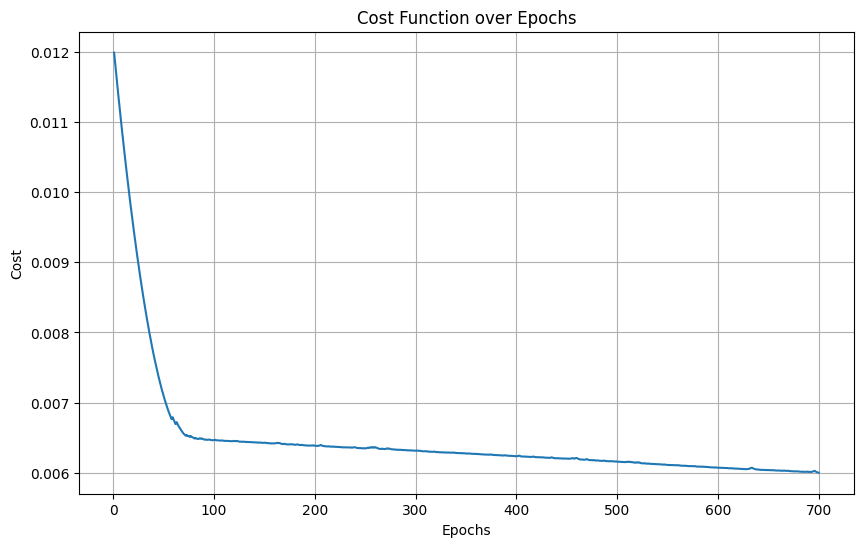

In [30]:
regressor = LinearRegression()
regressor.lr = 0.0001
regressor.clip_value = 0.1
regressor.epochs = 100
regressor.reg_type='l2'
regressor.reg_strength=0.0001
regressor.fit(X,y,method='mini_batch')
y_pred =  regressor.predict(X)
mse = regressor.cost(X,y)
r2=regressor.r2_score(X,y)
mae=regressor.mae(X,y)
print("MSE: ",mse)
print("R2: ",r2)
print("MAE: ",mae)
regressor.plot_cost_history()
